# FAKE JOB POSTING DATA ANALYSIS

- The given database contains a collection of job postings, some of which are fraudulent. The data contains textual & meta info about these jobs. Study the details of the dataset and find out which industry has the highest number of fake job postings.

- Graphically display your answer

In [1]:
# Import basic libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Set up Visual appearance of plots
#chart size
plt.rcParams["figure.figsize"] = (16, 8)
#background
plt.style.use("fivethirtyeight")

In [2]:
#Read the csv file
df = pd.read_csv('fake_job_postings.csv')

In [3]:
#Take a quick glance at the data
df.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [4]:
#Check the number of rows and columns in the dataframe
df.shape

(17880, 18)

In [5]:
#Get concise summary of dataframe
#The dataset contains missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
#Get descriptive statistics of dataframe - include non-numeric columns
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
job_id,17880,NaN,NaN,NaN,8940.5,5161.66,1,4470.75,8940.5,13410.2,17880
title,17880,11231,English Teacher Abroad,311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,17534,3105,"GB, LND, London",718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
department,6333,1337,Sales,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_range,2868,874,0-0,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_profile,14572,1709,We help teachers get safe &amp; secure jobs ab...,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,17879,14801,"Play with kids, get paid for it Love travel? J...",379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requirements,15185,11968,University degree required. TEFL / TESOL / CEL...,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
benefits,10670,6205,See job description,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
telecommuting,17880,NaN,NaN,NaN,0.0428971,0.202631,0,0,0,0,1


## DEALING WITH MISSING VALUES

In [7]:
# Since we're dealing with only industries and fradulent cases, create new dataframe including only these for concise analysis
df_new = df[['industry', 'fraudulent']]
df_new

,industry,fraudulent
0,NaN,0
1,Marketing and Advertising,0
2,NaN,0
3,Computer Software,0
4,Hospital & Health Care,0
...,...,...
17875,Computer Software,0
17876,Internet,0
17877,NaN,0
17878,Graphic Design,0


In [8]:
# check number of missing values
print(df_new["industry"].isnull().sum())
print(df_new["fraudulent"].isnull().sum())

4903
0


In [9]:
# Drop rows containing null values
# Its not a good practice to drop missing values but for the sake of this analysis we'll drop missing values
df_new = df_new.dropna(subset=["industry"])

In [10]:
# Confirm missing values have been dropped
df_new["industry"].isnull().sum()

0

In [11]:
# Check new shape of data
df_new.shape

(12977, 2)

## EXPLORATORY ANALYSIS

In [12]:
# Get the total number of (unique) industries
# There are 131 unique industries in the dataset
df_new['industry'].value_counts().count()

131

In [13]:
# Get the frequency of (unique) industries
# Information Technology has the highest no of Job posting and industries like Sporting goods rank the lowest
df_new['industry'].value_counts()

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Museums and Institutions                  1
Wine and Spirits                          1
Alternative Dispute Resolution            1
Shipbuilding                              1
Sporting Goods                            1
Name: industry, Length: 131, dtype: int64

In [14]:
# Display Top 10 industries with highest job posting
display(df_new.groupby(["industry"]).
        agg('count').
        sort_values(by = "fraudulent", ascending=False).head(10).
        style.background_gradient(cmap='BuGn'))

,fraudulent
industry,
Information Technology and Services,1734
Computer Software,1376
Internet,1062
Marketing and Advertising,828
Education Management,822
Financial Services,779
Hospital & Health Care,497
Consumer Services,358
Telecommunications,342


In [15]:
# Total number of Fradulent & Non-Fraudulent posting
# Fraudulent posting correspond to 1 and Non-Fraudulent posting is 0
# There are 591 industries with Fradulent job posting and 12386 industries with Non-Fradulent posting
df_new['fraudulent'].value_counts()

0    12386
1      591
Name: fraudulent, dtype: int64

In [16]:
# Display industries with non-fraudulent job posting
# The Information Technology and Services industry has the highest number of non-fradulent job posting
display(df_new.where(df_new["fraudulent"] == 0).
        groupby(['industry']).
        agg('count').
        sort_values(by = "fraudulent", ascending=False).
        head(15).
        style.background_gradient(cmap='BuGn'))

,fraudulent
industry,
Information Technology and Services,1702
Computer Software,1371
Internet,1062
Education Management,822
Marketing and Advertising,783
Financial Services,744
Hospital & Health Care,446
Consumer Services,334
Telecommunications,316


In [17]:
# Display each industry with Fake job posting
# Oil & Energy have the highest Fradulent job posting
display(df_new.where(df_new["fraudulent"] == 1).
        groupby(['industry']).
        agg('count').
        sort_values(by = "fraudulent", ascending=False).
        head(15).
        style.background_gradient(cmap='BuGn'))

,fraudulent
industry,
Oil & Energy,109
Accounting,57
Hospital & Health Care,51
Marketing and Advertising,45
Financial Services,35
Information Technology and Services,32
Telecommunications,26
Real Estate,24
Consumer Services,24


The Oil & Energy industry has total of 287 job postings of which 109 are fradulent and 178 are non-fraudulent

## VISUALIZATION

In [18]:
# Create a new dataframe of only fraudulent job posting
df2 = df_new.where(df_new["fraudulent"] == 1).groupby(['industry']).agg('count').sort_values(by = "fraudulent", 
                                                                                             ascending=False).head(10).reset_index()
df2

,industry,fraudulent
0,Oil & Energy,109
1,Accounting,57
2,Hospital & Health Care,51
3,Marketing and Advertising,45
4,Financial Services,35
5,Information Technology and Services,32
6,Telecommunications,26
7,Real Estate,24
8,Consumer Services,24
9,"Leisure, Travel & Tourism",21


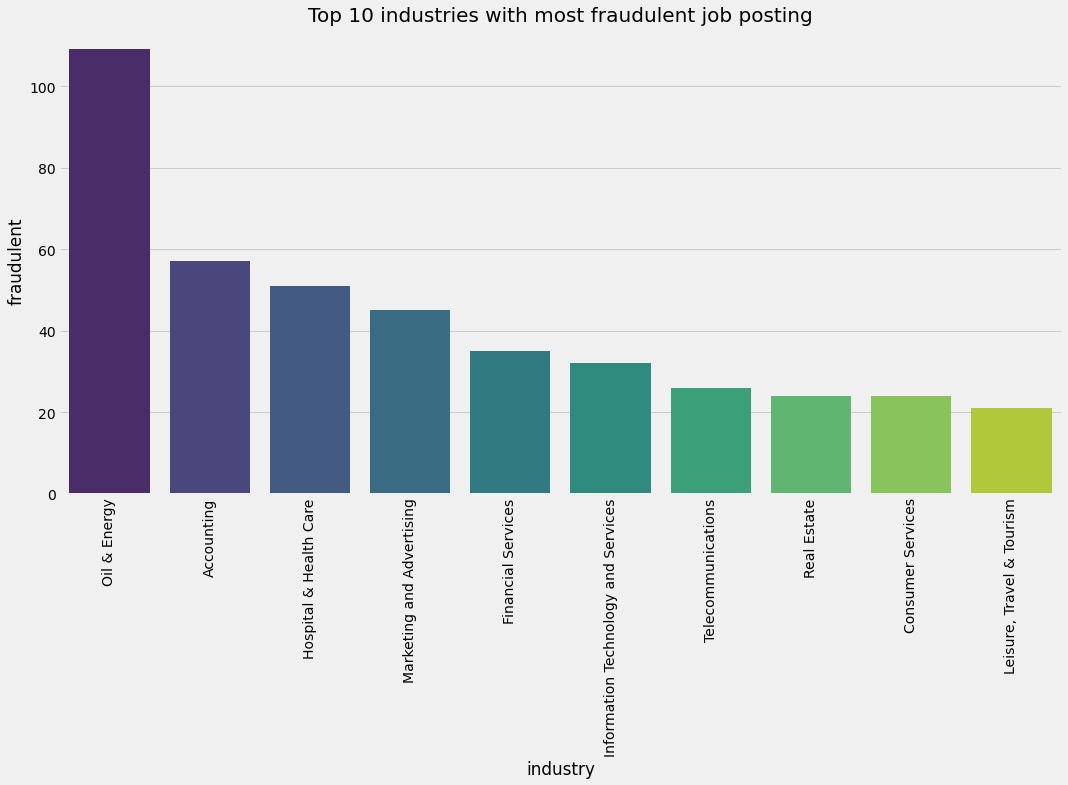

In [19]:
# Visualize the Top 10 industries with most fradulent job posting
sns.barplot(df2["industry"],
            df2["fraudulent"],
            palette="viridis")
plt.title("Top 10 industries with most fraudulent job posting", fontsize=20)
plt.xticks(rotation=90, fontsize=14)
plt.show()

In [20]:
# Extract job postings from the industry with highest ranking fraudulent cases - Oil & Energy
df3 = df_new.where(df_new["industry"] == "Oil & Energy").groupby(['fraudulent']).agg('count').reset_index()
df3

,fraudulent,industry
0,0.0,178
1,1.0,109


<function matplotlib.pyplot.show(*args, **kw)>

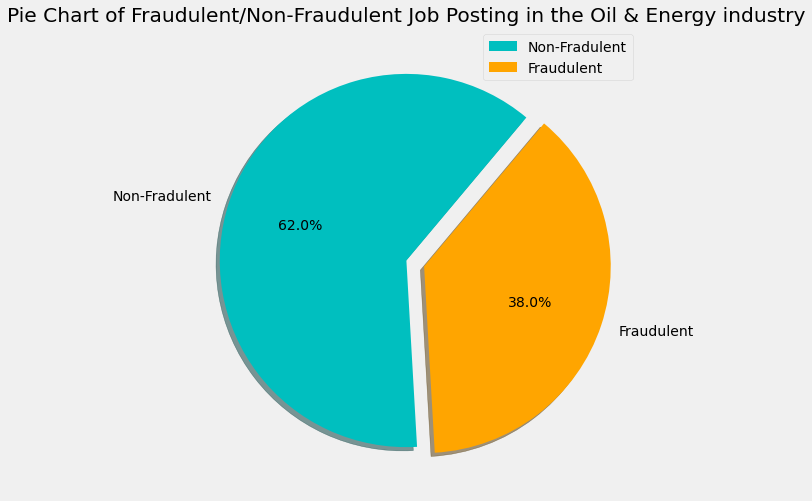

In [21]:
# Visualize the Fraudulent and Non Fradulent cases in the industry with highest ranking fraudulent cases - Oil & Energy
labels = ['Non-Fradulent', 'Fraudulent']
color = ['c', 'Orange']
explode = (0, 0.1)

plt.pie(df3['industry'], 
        colors=color,
        explode=explode,
        labels=labels,
        autopct='%1.1f%%',
        shadow=True,
        startangle=50)
plt.legend()
plt.title("Pie Chart of Fraudulent/Non-Fraudulent Job Posting in the Oil & Energy industry")
plt.show

# CONCLUSION

- The Oil and Energy Industry has the highest number of Fake Job (Fraudulent) Posting.
- 38% of the total Job posting from the Oil and Energy industry are Fraudulent as can be seen in the visualization above.